In [1]:
import pandas as pd
import matplotlib.pyplot as plt

The original essential genes dataset had 28166 rows but only 26791 had available sequences.

In [2]:
deg_dataset = pd.read_csv("datasets/essential_genes.csv", sep=';')
print(deg_dataset.head())
print(deg_dataset.shape)

ensembl_dataset = pd.read_csv("datasets/ensembl.csv", sep=',')
print(ensembl_dataset.head())
print(ensembl_dataset.shape)

       id1          id2    id3   id4 id5 id6  \
0  DEG2006  DEG20060001   GBAP  GI:-   -   -   
1  DEG2006  DEG20060002  MTHFR  GI:-   -   -   
2  DEG2006  DEG20060003   ECE1  GI:-   -   -   
3  DEG2006  DEG20060004  HSPG2  GI:-   -   -   
4  DEG2006  DEG20060005  TGIF1  GI:-   -   -   

                                   id7           id8       id9         id10  \
0                     Beta-glucosidase  Homo sapiens      1q22  Rich medium   
1  Methylenetetrahydrofolate reductase  Homo sapiens   1p36.22  Rich medium   
2       Endothelin converting enzyme 1  Homo sapiens   1p36.12  Rich medium   
3                             Perlecan  Homo sapiens   1p36.12  Rich medium   
4                TG-interacting factor  Homo sapiens  18p11.31  Rich medium   

  id11 id12 id13        id14  \
0    -    -    -   HGNC:4178   
1    -    -    -   HGNC:7436   
2    -    -    -   HGNC:3146   
3    -    -    -   HGNC:5273   
4    -    -    -  HGNC:11776   

                                           

Creating positive essential genes dataset. Each sequence needs to be in at least 5 datasets.

In [3]:
# for each sequence, get all the datasets that contain it
d = {}
for _, row in deg_dataset.iterrows():
    if(row["sequence"] in d):
        d[row["sequence"]].append(row["id1"])
    else:
        d[row["sequence"]] = [row["id1"]]


# get a list of sequences that are in more than 5 datasets
essential_sequences = []
for key, val in d.items():
    if(len(val) >= 5):
        essential_sequences.append(key)
        
# create dataframe with essential sequences
eg_positive = pd.DataFrame(essential_sequences, columns=["sequence"])
print(eg_positive.head())
print(eg_positive.shape)

                                            sequence
0  ATGGTGCTGTCCCAGAGACAACGAGATGAACTAAATCGAGCTATAG...
1  ATGGCTGCAGCTTCATATGATCAGTTGTTAAAGCAAGTTGAGGCAC...
2  ATGAGCCGCCTGCTCTGGAGGAAGGTGGCCGGCGCCACCGTCGGGC...
3  ATGCAGAGCTGGAGTCGTGTGTACTGCTCCTTGGCCAAGAGAGGCC...
4  ATGGTTGGCTATGACCCCAAACCAGATGGCAGGAATAACACCAAGT...
(2010, 1)


At this point, we have 3 different datasets:
* deg_dataset -> dataset with all genes from the DEG dataset (26791, 15)
* ensembl_dataset -> dataset with all genes from the Ensembl dataset (22824, 2)
* eg_positive -> positive dataset with essential genes (genes contained in at least 5 datasets) (2010, 1)

Now we need to remove from the Ensembl dataset the sequences that are in the essential genes dataset.

In [4]:
unique_deg_sequences = list(set(deg_dataset["sequence"]))
print("unique deg sequences:", len(unique_deg_sequences))
old_shape = ensembl_dataset.shape

# remove all occurences of unique_deg_sequences from ensembl dataset
ensembl_dataset = ensembl_dataset[~ensembl_dataset["sequence"].isin(unique_deg_sequences)]

print("removed:", old_shape[0] - ensembl_dataset.shape[0])
print(ensembl_dataset.shape)

unique deg sequences: 6890
removed: 14
(22810, 2)


Calculating length of each sequence and cleaning up the data

In [5]:
# calculate length of each gene (last row)
deg_dataset["length"] = deg_dataset["sequence"].str.len()
ensembl_dataset["length"] = ensembl_dataset["sequence"].str.len()

In [6]:
deg_dataset = deg_dataset[deg_dataset["length"] <= 27000]
print(deg_dataset.shape)

ensembl_dataset = ensembl_dataset[ensembl_dataset["length"] <= 100000]
print(ensembl_dataset.shape)

(26790, 16)
(19032, 3)


Statistics about the data, including:
* Total sequences
* Top 5 longest and shortest sequences
* Average length of sequences
* Top 5 most and least common sequence length

In [7]:
def stats(dataset):
    dataset["length"].hist(bins=100)
    plt.show()

    print("-" * 40)

    print("Total sequences:", dataset.shape[0])

    print("-" * 40)

    print("Top 5 longest sequences:")
    print("id       length")
    print(dataset["length"].nlargest(5).to_string())

    print("-" * 40)

    print("Top 5 shortest sequences:")
    print("id       length")
    print(dataset["length"].nsmallest(5).to_string())

    print("-" * 40)

    average_length = dataset["length"].mean()
    print("Average length:", average_length)

    print("-" * 40)

    print("Top 5 most common lengths:")
    print("length   count")
    print(dataset["length"].value_counts().nlargest(5).to_string())
    
    print("-" * 40)

    print("Top 5 least common lengths:")
    print("length   count")
    print(dataset["length"].value_counts().nsmallest(5).to_string())

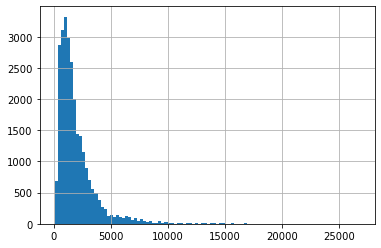

----------------------------------------
Total sequences: 26790
----------------------------------------
Top 5 longest sequences:
id       length
19660    26778
1223     26394
2298     25578
1661     23253
3222     23253
----------------------------------------
Top 5 shortest sequences:
id       length
5943      78
8094      78
25617    135
4647     144
6718     144
----------------------------------------
Average length: 1951.3291899962674
----------------------------------------
Top 5 most common lengths:
length   count
1041    87
1083    87
1314    85
555     80
1005    79
----------------------------------------
Top 5 least common lengths:
length   count
3240    1
3417    1
5751    1
6054    1
3660    1
****************************************************************************************************


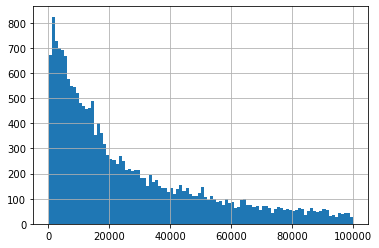

----------------------------------------
Total sequences: 19032
----------------------------------------
Top 5 longest sequences:
id       length
20208    99989
450      99960
12089    99954
14019    99917
15700    99892
----------------------------------------
Top 5 shortest sequences:
id       length
21861    39
22277    51
22035    54
22603    57
22653    63
----------------------------------------
Average length: 25790.488230348885
----------------------------------------
Top 5 most common lengths:
length   count
1272    31
1593    24
939     23
930     21
936     15
----------------------------------------
Top 5 least common lengths:
length   count
6604     1
33754    1
14208    1
68466    1
35460    1


In [8]:
stats(deg_dataset)
print("*" * 100)
stats(ensembl_dataset)

In [9]:
with open('datasets/eg_positive.csv', 'w') as file:
    file.write('id,sequence\n')
    eg_positive.to_csv(file, sep=',', header=False)

In [10]:
# average_length = int(average_length)

# cut sequences to the average length
# seqs_dataset = seqs_dataset.str.slice(0, average_length)

# fill with "N" the sequences that are shorter than average length
# seqs_dataset = seqs_dataset.str.pad(average_length, side='right', fillchar='N')